# Importing packages

In [1]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.special import softmax
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


# Getting the data

In [4]:
df = pd.read_csv(r"E:\Machine Learning Project\archive (10)\train.csv")

In [5]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [8]:
df_copy = df.copy()

In [9]:
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [10]:
df_copy.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [11]:
df_copy.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [12]:
df_copy['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [13]:
bins = [15, 24, 38, 50, 65, 90]
age_bins = pd.cut(df['Age'], bins)
df_copy['Age_bins'] = age_bins


In [14]:
df_copy.dtypes

ID                    int64
Gender               object
Ever_Married         object
Age                   int64
Graduated            object
Profession           object
Work_Experience     float64
Spending_Score       object
Family_Size         float64
Var_1                object
Segmentation         object
Age_bins           category
dtype: object

<Axes: ylabel='Density'>

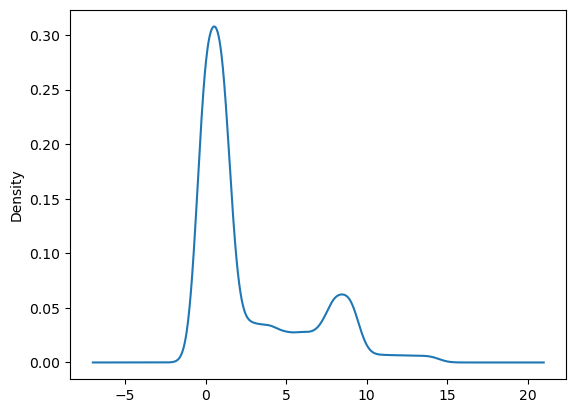

In [15]:
df_copy['Work_Experience'].plot.density()

<Axes: ylabel='Density'>

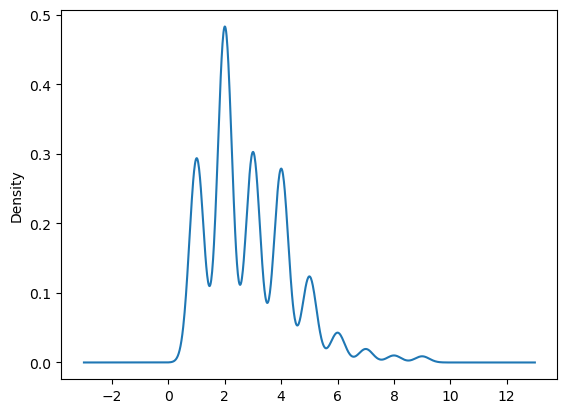

In [16]:
df_copy['Family_Size'].plot.density()

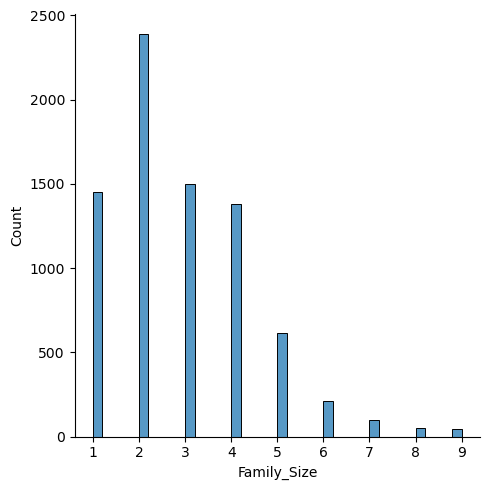

In [17]:
sns.displot(df_copy['Family_Size'])


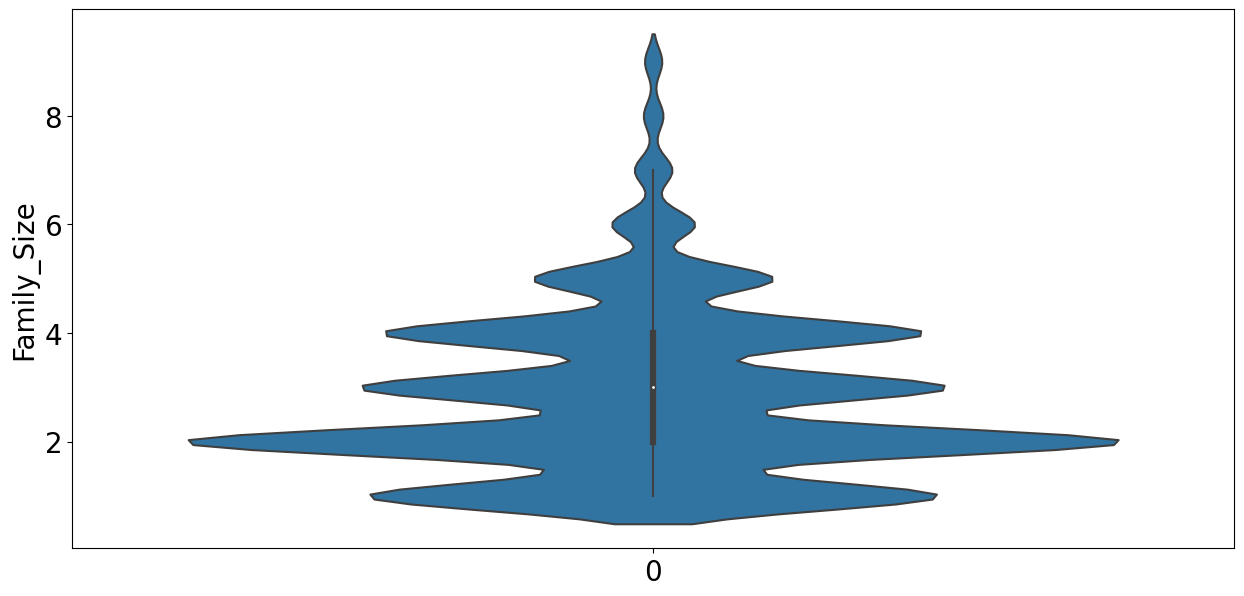

In [18]:
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams.update({'font.size': 20})

sns.violinplot(df_copy['Family_Size'])
plt.ylabel('Family_Size')
plt.show()

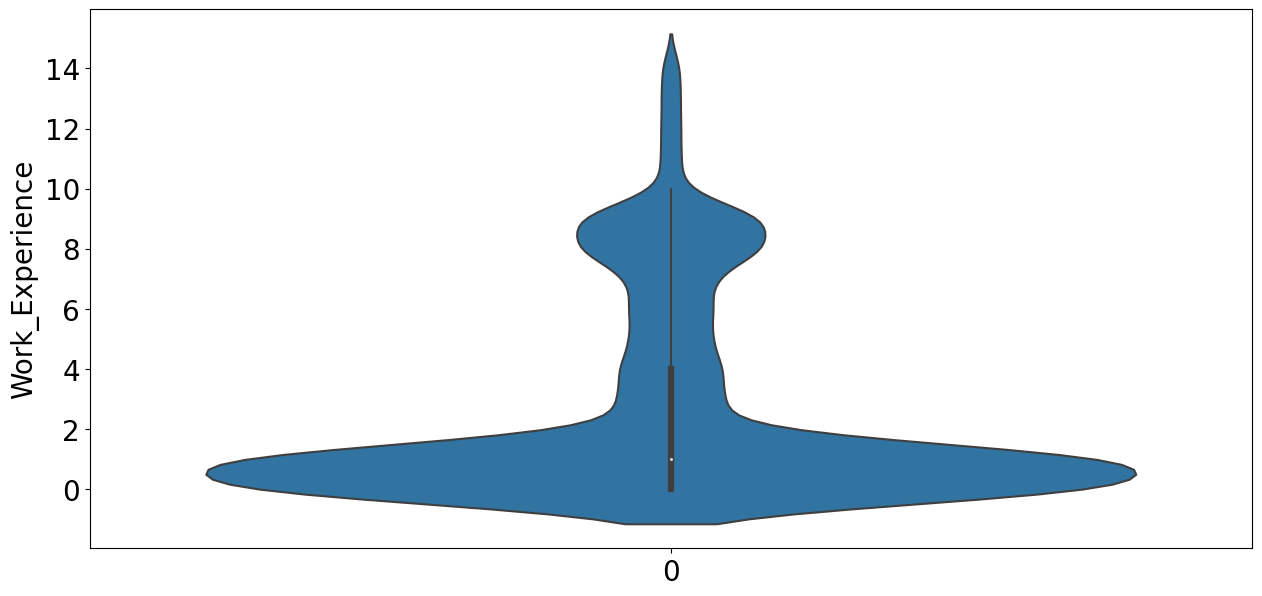

In [19]:
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams.update({'font.size': 20})

sns.violinplot(df_copy['Work_Experience'])
plt.ylabel('Work_Experience')
plt.show()

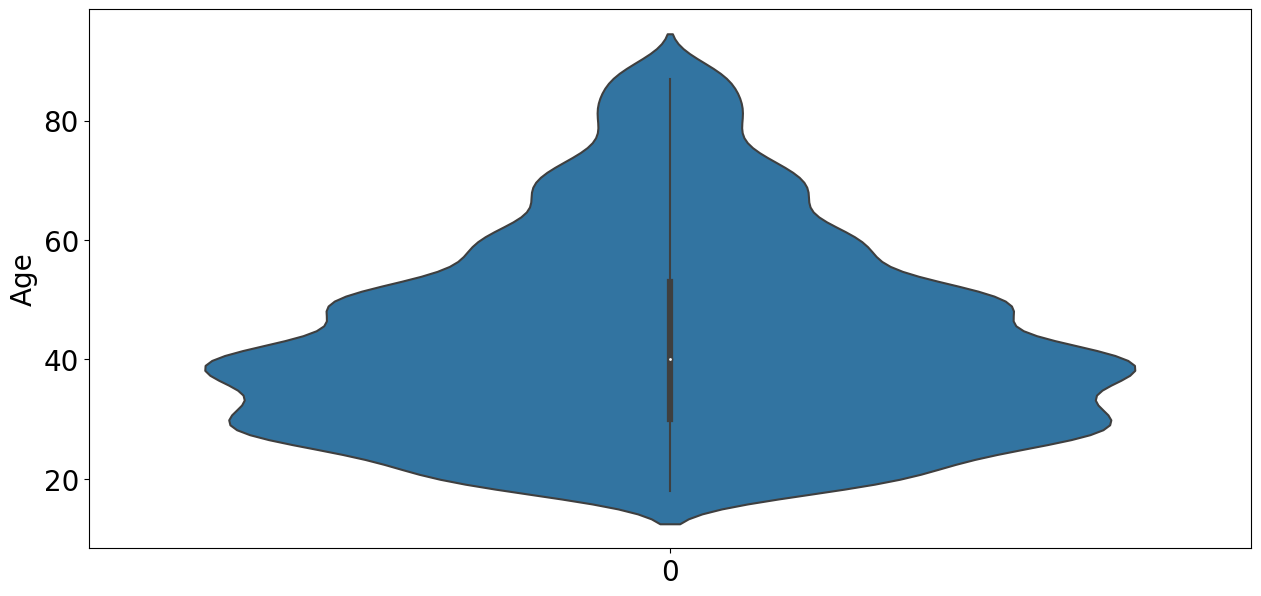

In [20]:
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams.update({'font.size': 20})

sns.violinplot(df_copy['Age'])
plt.ylabel('Age')
plt.show()

In [21]:
size = int(0.8 * len(df_copy))
df_copy_tr, df_copy_test = df_copy[: size], df_copy[size :]

In [22]:
df_gender = pd.DataFrame(df_copy.groupby('Segmentation')['Gender'].value_counts(normalize = True))
df_gender.stack().unstack(level = 1)['Male']

Segmentation        
A             Gender    0.539047
B             Gender    0.536598
C             Gender    0.531980
D             Gender    0.577160
Name: Male, dtype: float64

# Exploratory Data Analysis

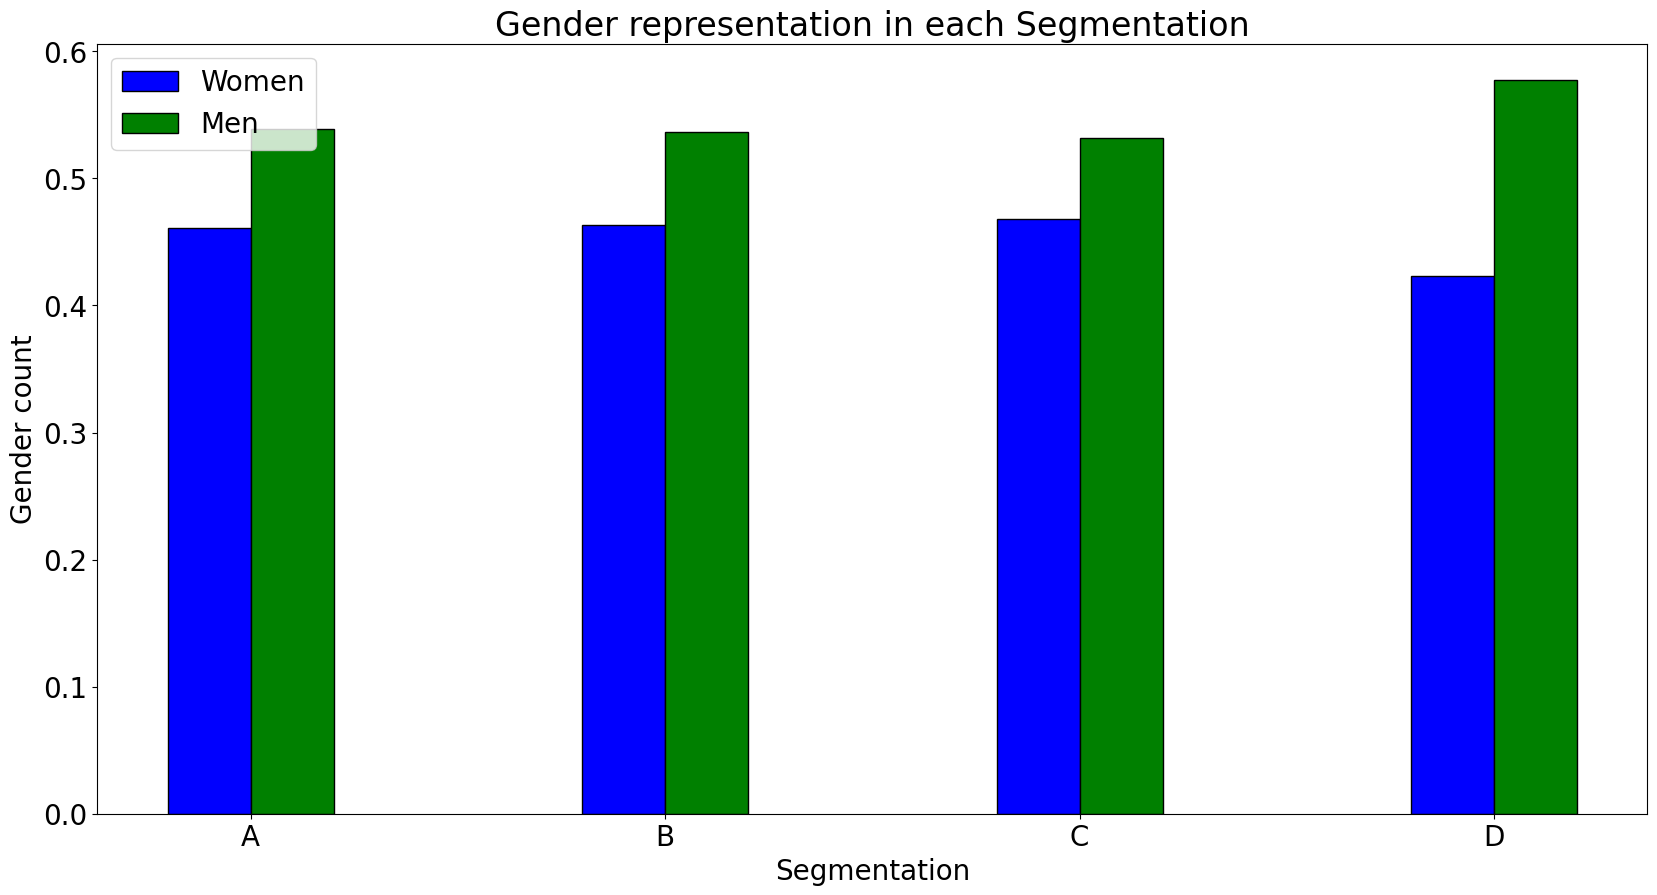

In [23]:
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size': 20})
df_gender = pd.DataFrame(df_copy.groupby('Segmentation')['Gender'].value_counts(normalize = True))
n = 4
r = np.arange(n)
width = 0.2
plt.bar(r, df_gender.stack().unstack(level = 1)['Female']
, color = 'b',
        width = width, edgecolor = 'black',
        label='Women')
plt.bar(r + width, df_gender.stack().unstack(level = 1)['Male'], color = 'g',
        width = width, edgecolor = 'black',
        label='Men')
  
plt.xlabel("Segmentation")
plt.ylabel("Gender count")
plt.title("Gender representation in each Segmentation")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['A','B','C','D'])
plt.legend(loc = 'upper left')
  
plt.show()

In [24]:
df_copy

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_bins
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,"(15, 24]"
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,"(24, 38]"
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,"(65, 90]"
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,"(65, 90]"
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,"(38, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,"(15, 24]"
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,"(24, 38]"
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,"(24, 38]"
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,"(24, 38]"


In [25]:
df_copy.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
Age_bins             0
dtype: int64

In [26]:
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_bins
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,"(15, 24]"
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,"(24, 38]"
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,"(65, 90]"
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,"(65, 90]"
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,"(38, 50]"


In [27]:
df_copy_tr.isnull().sum()

ID                   0
Gender               0
Ever_Married       107
Age                  0
Graduated           60
Profession          96
Work_Experience    654
Spending_Score       0
Family_Size        264
Var_1               57
Segmentation         0
Age_bins             0
dtype: int64

In [28]:
df_copy_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        33
Age                  0
Graduated           18
Profession          28
Work_Experience    175
Spending_Score       0
Family_Size         71
Var_1               19
Segmentation         0
Age_bins             0
dtype: int64

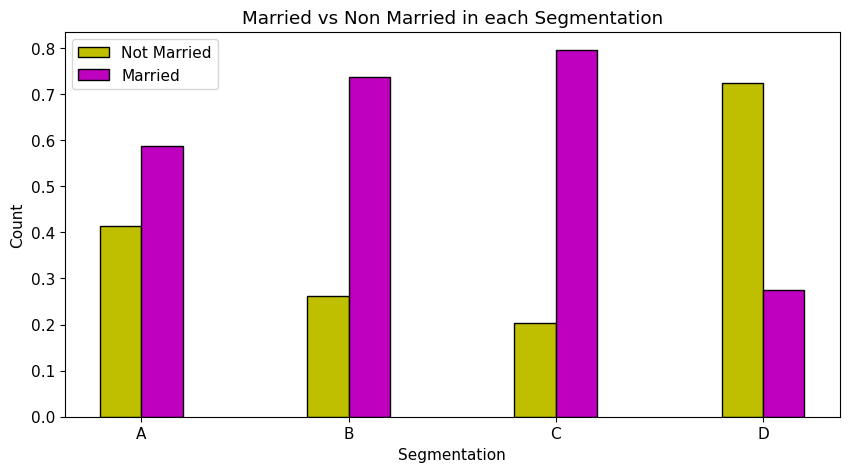

In [29]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})
df_evm = pd.DataFrame(df_copy.groupby('Segmentation')['Ever_Married'].value_counts(normalize = True))
df_evm.stack().unstack(level= 1)

n = 4
r = np.arange(n)
width = 0.2
plt.bar(r, df_evm.stack().unstack(level= 1).loc[:,'No'], color = 'y',
        width = width, edgecolor = 'black',
        label='Not Married')
plt.bar(r + width, df_evm.stack().unstack(level= 1).loc[:,'Yes'], color = 'm',
        width = width, edgecolor = 'black',
        label='Married')
  
plt.xlabel("Segmentation")
plt.ylabel("Count")
plt.title("Married vs Non Married in each Segmentation")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['A','B','C','D'])
plt.legend()
  
plt.show()

Text(0.5, 1.0, 'Mean Age of each Segmentation group')

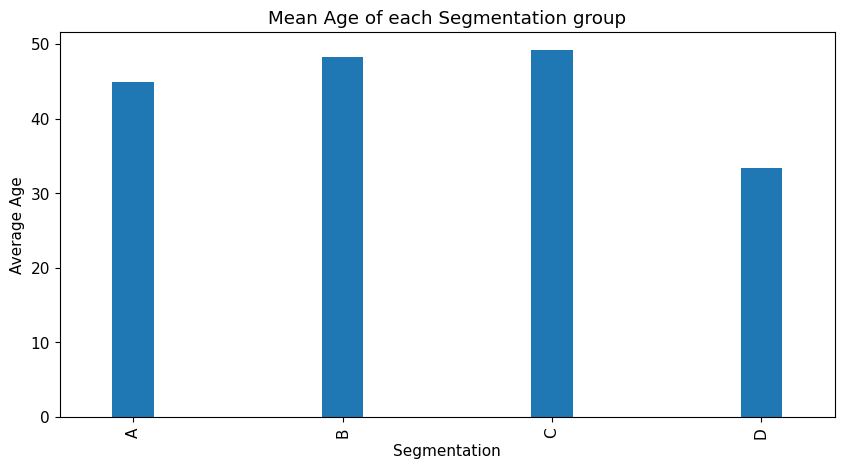

In [30]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})
df_copy.groupby('Segmentation')['Age'].mean().plot(kind = 'bar', width = width)
plt.ylabel('Average Age')
plt.xlabel('Segmentation')
plt.title("Mean Age of each Segmentation group")

In [31]:
df_ab = pd.DataFrame(df_copy.groupby('Segmentation')['Age_bins'].value_counts(normalize = True).sort_index())

In [32]:
df_ab = df_ab.stack().unstack(level = 1)

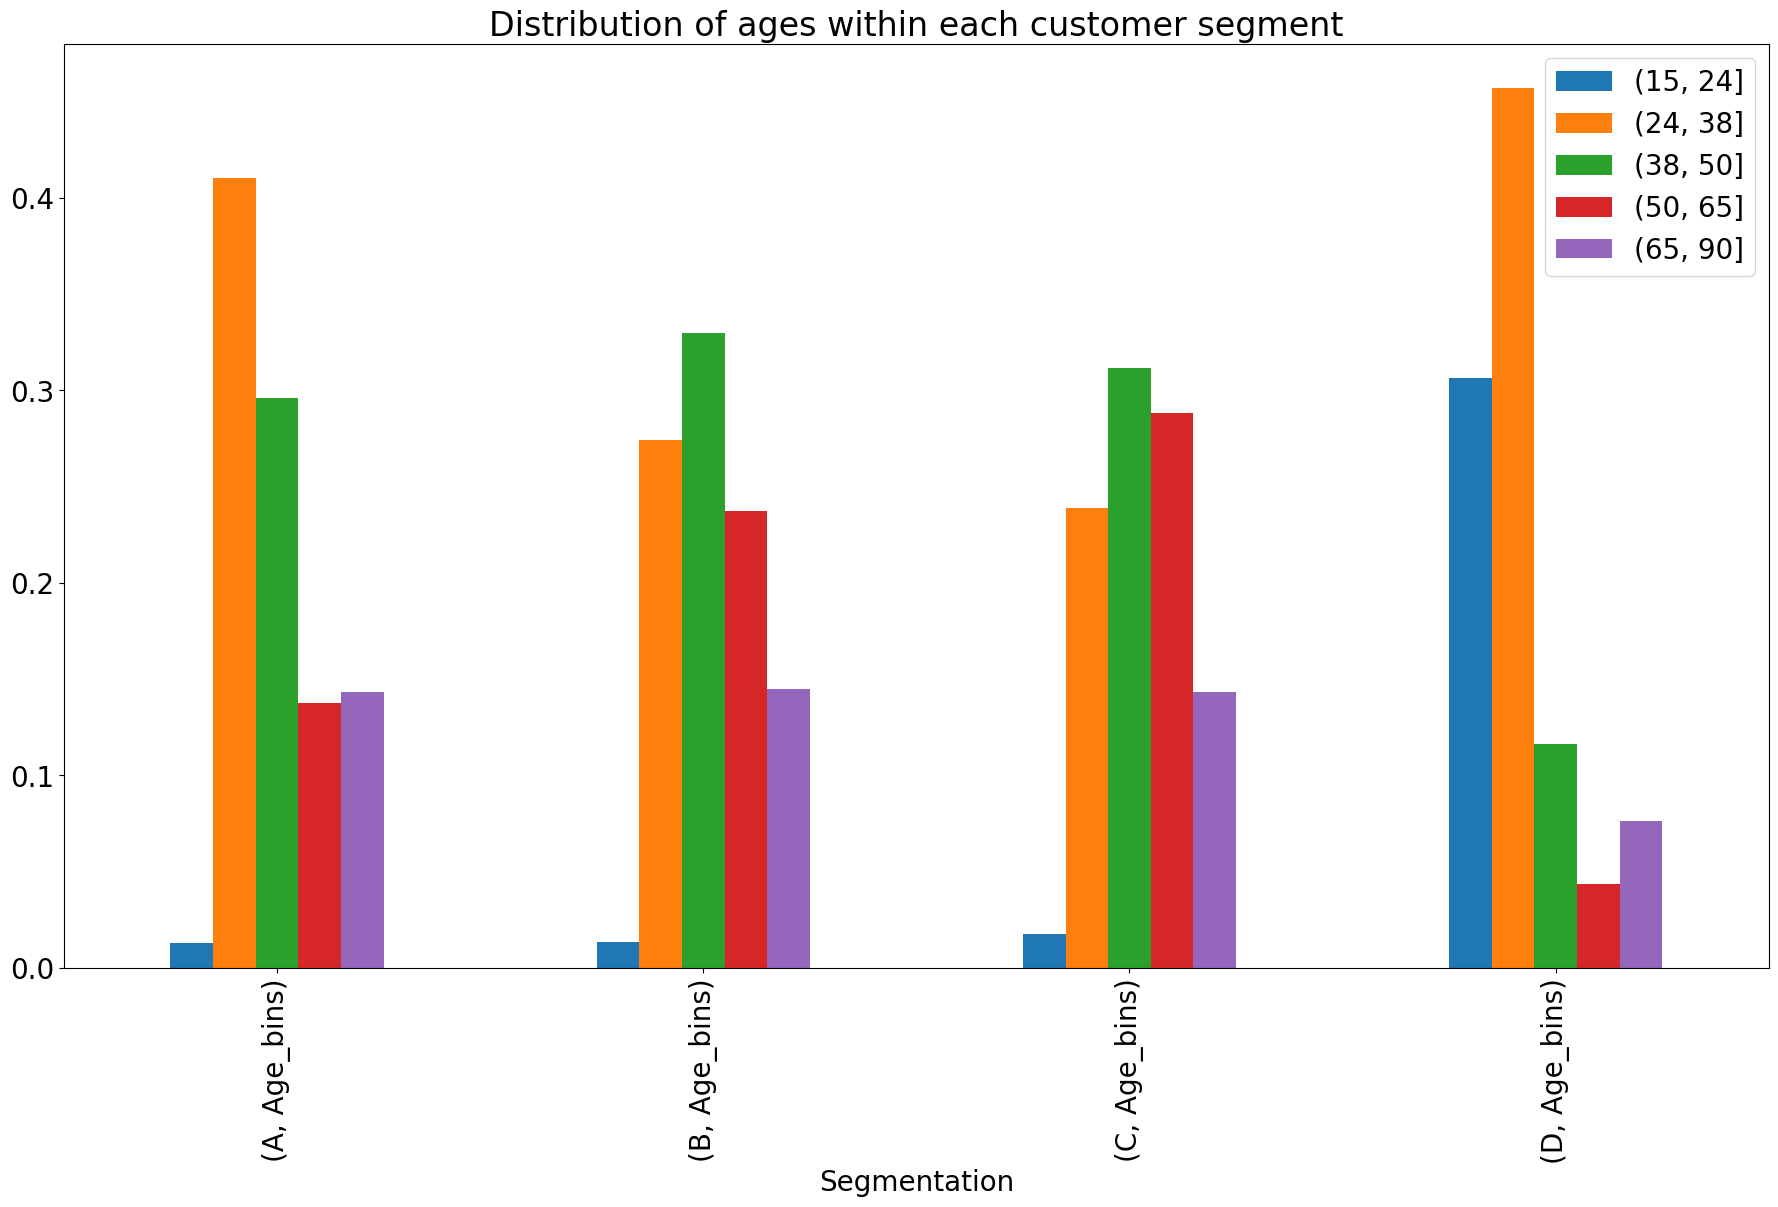

In [33]:
plt.rcParams['figure.figsize'] = [22, 12]
plt.rcParams.update({'font.size': 20})
df_ab.plot.bar()
plt.title('Distribution of ages within each customer segment')
plt.xlabel('Segmentation')
plt.legend(loc = 'upper right')
plt.show()

In [34]:
df_copy.groupby('Segmentation')['Graduated'].value_counts()


Segmentation  Graduated
A             Yes          1219
              No            729
B             Yes          1332
              No            508
C             Yes          1607
              No            348
D             No           1437
              Yes           810
Name: Graduated, dtype: int64

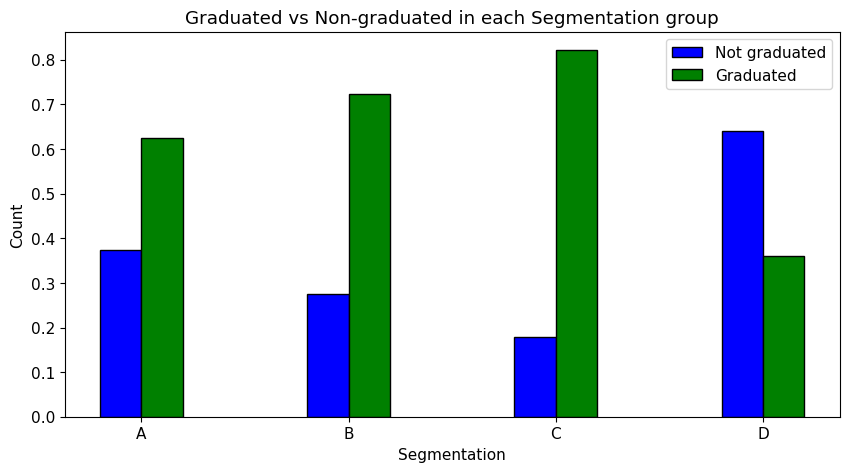

In [35]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})

n = 4
r = np.arange(n)
width = 0.2
plt.bar(r, df_copy.groupby('Segmentation')['Graduated'].value_counts(normalize = True)[:,'No']
, color = 'b',
        width = width, edgecolor = 'black',
        label='Not graduated')
plt.bar(r + width, df_copy.groupby('Segmentation')['Graduated'].value_counts(normalize = True)[:,'Yes'], color = 'g',
        width = width, edgecolor = 'black',
        label='Graduated')
  
plt.xlabel("Segmentation")
plt.ylabel("Count")
plt.title("Graduated vs Non-graduated in each Segmentation group")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['A','B','C','D'])
plt.legend()
  
plt.show()

In [36]:
df_copy_tr['Profession'].value_counts()

Artist           1996
Healthcare       1076
Entertainment     767
Doctor            564
Engineer          562
Lawyer            506
Executive         465
Marketing         225
Homemaker         197
Name: Profession, dtype: int64

In [37]:
df_copy_tr.isnull().sum()

ID                   0
Gender               0
Ever_Married       107
Age                  0
Graduated           60
Profession          96
Work_Experience    654
Spending_Score       0
Family_Size        264
Var_1               57
Segmentation         0
Age_bins             0
dtype: int64

In [38]:
df_copy_tr['Graduated'].value_counts()

Yes    3959
No     2435
Name: Graduated, dtype: int64

Text(0.5, 1.0, 'Average Work Experience for each Segmentation group')

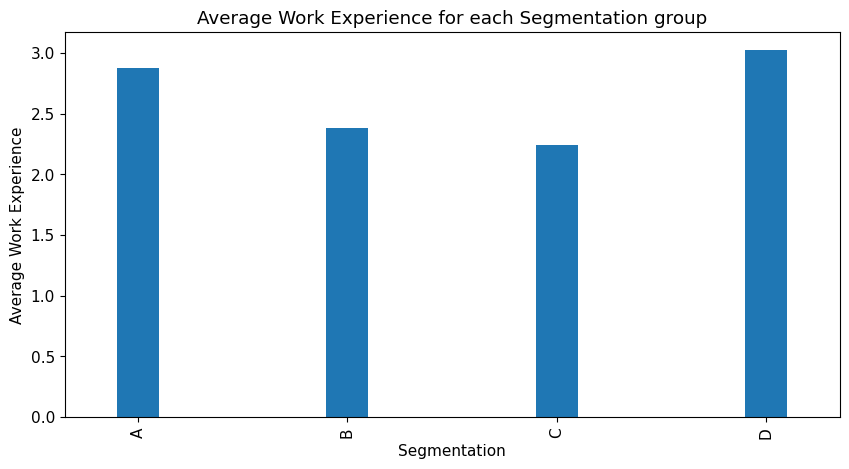

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})

df_copy.groupby('Segmentation')['Work_Experience'].mean().plot(kind = 'bar', width = width)
plt.xlabel('Segmentation')
plt.ylabel('Average Work Experience')
plt.title("Average Work Experience for each Segmentation group")

In [40]:
def fill_missing(col):
    df_copy = df.copy
    segments = ['A', 'B', 'C', 'D'] 
    if df_copy[col].dtype == 'O':
        mode = df_copy.groupby('Segmentation')[col].agg(pd.Series.mode)
        if col == 'Graduated':
            df_copy.loc[((df_copy['Age']>=18) &(df_copy['Age']<24) & (df_copy['Graduated'].isnull())), 
                        'Graduated'] = 'No'
            for seg in segments:
                df_copy.loc[(df_copy[col].isnull()) & 
                (df_copy['Segmentation'] == seg), col] = mode[seg]
        else:
            for seg in segments:
                df_copy.loc[(df_copy[col].isnull()) & 
                (df_copy['Segmentation'] == seg), col] = mode[seg]
    else:
        mean = df_copy.groupby('Segmentation')[col].mean()
        for seg in segments:
            df_copy.loc[(df_copy[col].isnull()) & 
                (df_copy['Segmentation'] == seg), col] = mean[seg]

missing = ['Ever_Married', 'Graduated', 'Profession', 
           'Work_Experience', 'Family_Size']


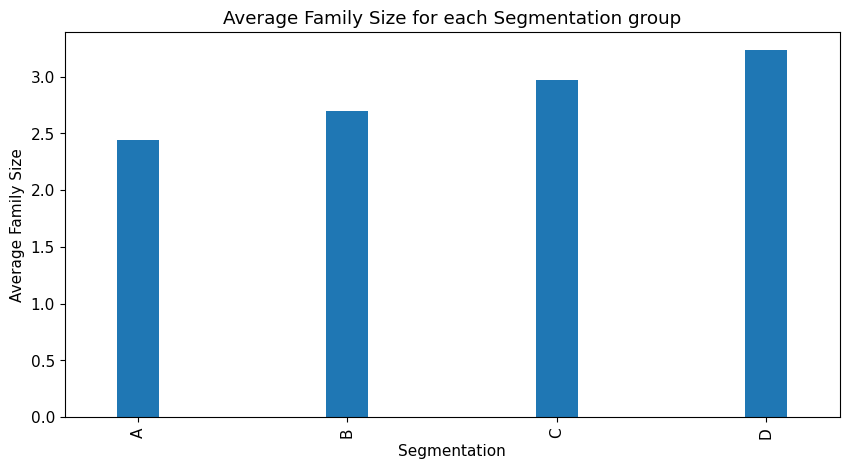

In [41]:
df_copy.groupby('Segmentation')['Family_Size'].mean().plot(kind = 'bar', width = width)
plt.xlabel('Segmentation')
plt.ylabel('Average Family Size')
plt.title("Average Family Size for each Segmentation group")
plt.show()

In [42]:
df_seg = pd.DataFrame(df_copy.groupby('Segmentation')['Spending_Score'].value_counts(normalize = True))

In [43]:
df_seg.sort_index(inplace = True)

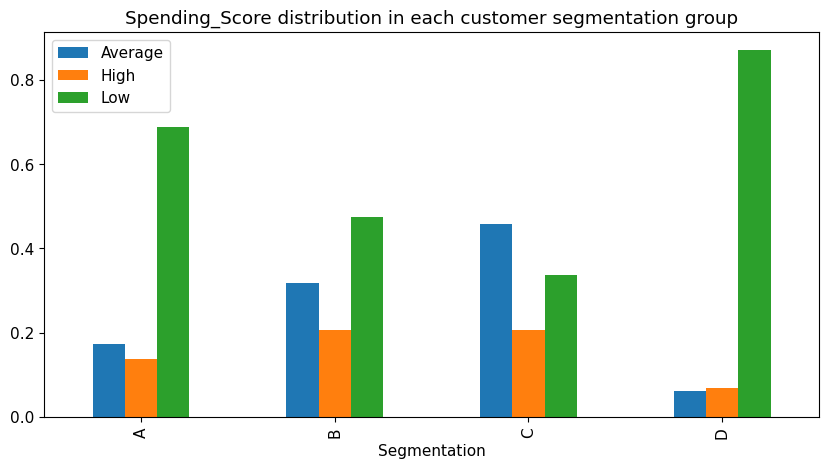

In [44]:
df_seg.stack().unstack(level = 1).plot.bar()
x = [0,1,2,3]
segments = ['A', 'B', 'C', 'D']
plt.xticks(x, segments, rotation = 'vertical')
plt.title('Spending_Score distribution in each customer segmentation group')
plt.legend(loc = 'upper left')
plt.xlabel('Segmentation')
plt.show()

In [45]:
df_var = pd.DataFrame(df_copy.groupby('Segmentation')['Var_1'].value_counts(normalize = True))

In [46]:
df_var = df_var.stack().unstack(level = 1)

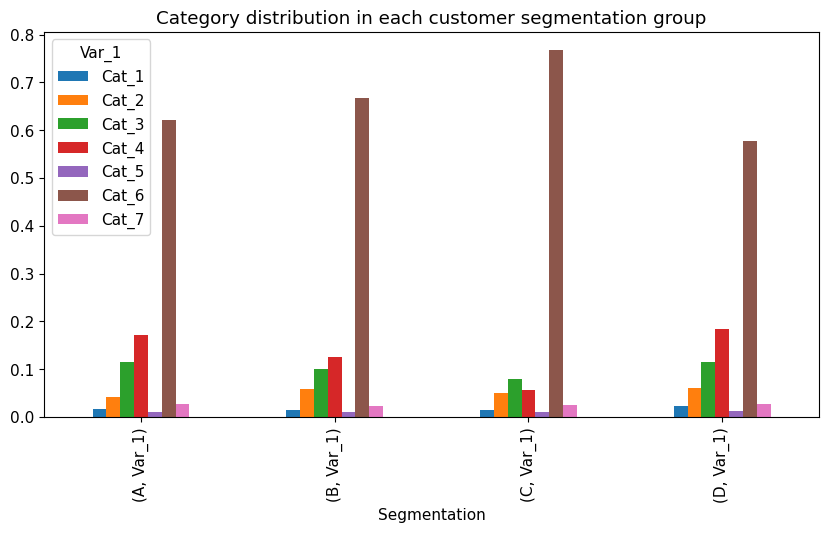

In [47]:
plt.rcParams.update({'font.size': 11})

df_var.plot.bar()
plt.title('Category distribution in each customer segmentation group')
plt.xlabel('Segmentation')
plt.show()

In [48]:
df_var

,Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,,
A,Var_1,0.015873,0.042499,0.114183,0.170507,0.009729,0.621096,0.026114
B,Var_1,0.014092,0.057453,0.100813,0.125745,0.010840,0.667751,0.023306
C,Var_1,0.013340,0.050795,0.079015,0.055926,0.009236,0.767573,0.024115
D,Var_1,0.022272,0.059688,0.115367,0.184855,0.012472,0.577728,0.027617


In [49]:
df_pro = pd.DataFrame(df_copy.groupby('Segmentation')['Profession'].value_counts(normalize = True))
df_pro = df_pro.sort_index()


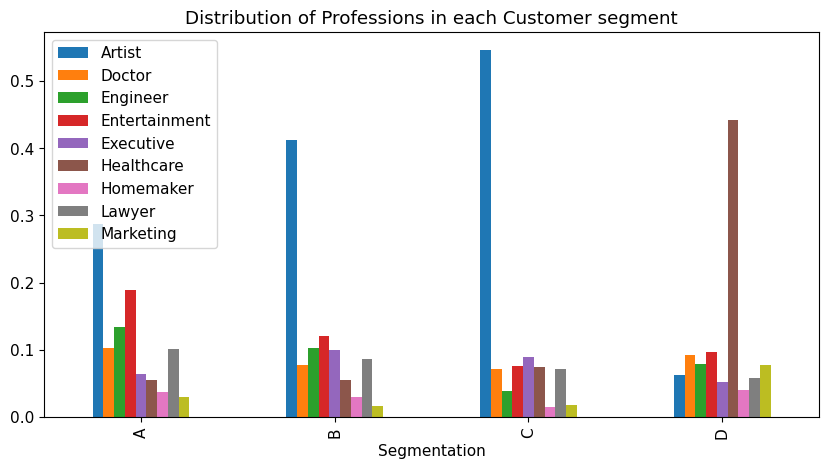

In [50]:

segments = ['A', 'B', 'C', 'D']
x = [0,1,2,3]

df_pro.stack().unstack(level = 1).plot.bar()
plt.xticks(x, segments, rotation = 'vertical')
plt.xlabel('Segmentation')
plt.legend(loc = 'upper left')
plt.xlabel('Segmentation')
plt.title('Distribution of Professions in each Customer segment')
plt.show()

## Data Preprocessing

In [51]:
age_cat = df_copy['Age_bins'].unique()
df_copy['Gender'].replace({'Male': 1, "Female": 0}, inplace = True)
df_copy['Spending_Score'].replace({'Low': 1, "Average": 2, "High": 3}, inplace = True)
df_copy['Age_bins'].replace({age_cat[0]: 1, age_cat[1]: 2, age_cat[2]: 3, age_cat[3]: 4, age_cat[4]: 5}, 
                               inplace = True)


In [52]:
size = int(0.8 * len(df_copy))
df_copy_tr, df_copy_test = df_copy[: size], df_copy[size :]

In [53]:
def find_optimal_k(X_train, y_train, X_test, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    accuracy_rate = []
    for k in range(1,50):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        pred = neigh.predict(X_test)
        accuracy_rate.append(np.mean(pred == y_test))
    accuracy_arr = np.array(accuracy_rate)
    max_acc = np.argmax(accuracy_arr)
    return max_acc + 1

def impute_nan(cols, dataframe):
    df_exp = dataframe.copy()
    if df_exp.Work_Experience.isnull().sum()>0:
        df_exp.Work_Experience = df_exp.Work_Experience.fillna(df_exp.Work_Experience.median())
    if df_exp.Family_Size.isnull().sum()>0:
        df_exp.Family_Size = df_exp.Family_Size.fillna(df_exp.Family_Size.median())
    col_names = df_exp.drop(columns = [col, 'Segmentation','ID','Family_Size',
                                       'Work_Experience', 'Age', 'Age_bins', 
                                       'Spending_Score', 'Gender'], axis = 1).columns
    df_with_dummies = pd.get_dummies(data=df_exp, columns= col_names)
    df1 = df_with_dummies.dropna()
    X_miss =  df1.drop(col, axis =1).select_dtypes([np.number])
    y_miss = df1[col].to_numpy()
    if df_with_dummies[col].dtypes == 'O':
        le = LabelEncoder()
        y_miss = le.fit_transform(y_miss)
    scale = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, test_size = 0.2, random_state = 42)
    X_train = scale.fit_transform(X_train)
    X_test = scale.fit_transform(X_test)
    k = find_optimal_k(X_train, y_train, X_test, y_test)
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    df_test = df_with_dummies[df_with_dummies[col].isnull()]
    df_test = df_test.drop(col, axis = 1)
    df_null = df_test.dropna().select_dtypes([np.number])
    X_null = df_null.to_numpy()
    X_null = scale.fit_transform(X_null)
    pred_col = knn.predict(X_null) 
    index = df_null.index
    df_results = pd.DataFrame(columns = [col], index = index)
    df_results['predictions'] = le.inverse_transform(pred_col)
    df_exp.loc[df_results.index, col] = df_results.predictions
    return df_exp

cat_col = ['Ever_Married', 'Graduated', 'Profession']
for col in cat_col:
    df_copy_tr = impute_nan(col, df_copy_tr)
for col in cat_col:
    df_copy_test = impute_nan(col, df_copy_test)

In [54]:
df_copy_tr['Ever_Married'].replace({'Yes': 1, 'No': 0}, inplace = True)
df_copy_test['Ever_Married'].replace({'Yes': 1, 'No': 0}, inplace = True)
df_copy_tr['Graduated'].replace({'Yes': 1, 'No': 0}, inplace = True)
df_copy_test['Graduated'].replace({'Yes': 1, 'No': 0}, inplace = True)



# Splitting the data into train and test

In [55]:
df_train = pd.get_dummies(data = df_copy_tr, 
                           columns = ['Profession', 'Var_1']).dropna()
df_test = pd.get_dummies(data = df_copy_test, 
                           columns = ['Profession', 'Var_1']).dropna()
X_train = df_train.drop(['Segmentation', 'Var_1_Cat_1', 'Var_1_Cat_2', 
                         'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'], axis = 1).to_numpy()
y_train = df_train['Segmentation'].to_numpy()
X_test = df_test.drop(['Segmentation', 'Var_1_Cat_1', 'Var_1_Cat_2', 
                       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'], axis = 1).to_numpy()
y_test = df_test['Segmentation'].to_numpy()


In [56]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [57]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC


In [58]:
accuracy = pd.DataFrame(columns  = ['Accuracy_mean', 'Precision', 'Recall', 'F1_score'], index = ['Logistic Regression', 
                                                          'SVM', 'Decision Tree', 'Xgboost', 
                                                          'Gradient Boosting Classifier', 
                                                          'Neural Network'])

In [59]:
def fill_metrics(model, predictions):
    accuracy.loc[model, 'Accuracy_mean'] = accuracy_score(y_test, predictions)
    accuracy.loc[model, 'Precision'] = precision_score(y_test, predictions, average = 'weighted')
    accuracy.loc[model, 'Recall'] = recall_score(y_test, predictions, average = 'weighted')
    accuracy.loc[model, 'F1_score'] = f1_score(y_test, predictions, average = 'weighted')
    return accuracy

# Model Selection

In [60]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

svc_model = OneVsOneClassifier(LinearSVC(random_state=0))
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
fill_metrics('SVM', pred_svc)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,NaN,NaN,NaN,NaN
SVM,0.511772,0.495632,0.511772,0.495994
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN


In [61]:
lm = linear_model.LogisticRegression(multi_class='multinomial')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
distributions = dict(C=uniform(loc=0, scale=4),
                    penalty=['l2', 'l1'], 
                     solver = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
rand_lm = RandomizedSearchCV(lm, distributions, random_state=0)
rand_lm.fit(X_train, y_train)

pred_rand_lm = rand_lm.predict(X_test)
rand_lm.score(X_test, y_test)
fill_metrics('Logistic Regression', pred_rand_lm)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.513631,0.497132,0.513631,0.495509
SVM,0.511772,0.495632,0.511772,0.495994
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN


In [62]:
X_train.shape[1]

20

In [63]:
y_train[:5]

array(['D', 'A', 'B', 'B', 'A'], dtype=object)

In [64]:
y_test[:5]

array(['A', 'D', 'D', 'A', 'D'], dtype=object)

In [65]:
from keras.utils import to_categorical
l_en = LabelEncoder()
y_train = l_en.fit_transform(y_train)
y_test = l_en.fit_transform(y_test)

dummy_y_train = to_categorical(y_train)
dummy_y_train
dummy_y_test = to_categorical(y_test)

In [66]:
model = Sequential()
model.add(Dense(100, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(25, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, dummy_y_train , epochs = 150, batch_size = 1000)
scores = model.evaluate(X_test, dummy_y_test)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/150
7/7 [==============================] - 2s 7ms/step - loss: 1.4147 - accuracy: 0.2485
Epoch 2/150
7/7 [==============================] - 0s 6ms/step - loss: 1.3270 - accuracy: 0.3894
Epoch 3/150
7/7 [==============================] - 0s 5ms/step - loss: 1.2675 - accuracy: 0.4523
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 1.2255 - accuracy: 0.4744
Epoch 5/150
7/7 [==============================] - 0s 6ms/step - loss: 1.1938 - accuracy: 0.4836
Epoch 6/150
7/7 [==============================] - 0s 6ms/step - loss: 1.1672 - accuracy: 0.4935
Epoch 7/150
7/7 [==============================] - 0s 6ms/step - loss: 1.1449 - accuracy: 0.5012
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 1.1261 - accuracy: 0.5048
Epoch 9/150
7/7 [==============================] - 0s 6ms/step - loss: 1.1110 - accuracy: 0.5149
Epoch 10/150
7/7 [==============================] - 0s 5ms/step - loss: 1.0991 - accuracy: 0.5163
Epoch 11/150
7/7 [===========

In [67]:
scores

[1.1172316074371338, 0.5018587112426758]

In [68]:
pred = model.predict(X_test)
class_pred = np.zeros((pred.shape[0],))
class_true = np.zeros((y_test.shape[0],))
for i in range(len(pred)):
    class_pred[i] = np.argmax(pred[i])
    
for i in range(len(y_test)):
    class_true[i] = np.argmax(y_test[i])

51/51 [==============================] - 0s 2ms/step


In [69]:
fill_metrics('Neural Network', class_pred)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.513631,0.497132,0.513631,0.495509
SVM,0.511772,0.495632,0.511772,0.495994
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,NaN,NaN,NaN,NaN
Neural Network,0.501859,0.490427,0.501859,0.494131


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
clf = GradientBoostingClassifier()
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }
randm_gbclf = RandomizedSearchCV(estimator=clf, param_distributions = parameters,
                               cv = 10, n_iter = 10, n_jobs=-1)
randm_gbclf.fit(X_train, y_train)
randm_gbclf.best_estimator_
model_gb = GradientBoostingClassifier(learning_rate=0.31613038970599905, max_depth=4,
                           n_estimators=657, subsample=0.8062766936135211, random_state = 0)
model_gb.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.31613038970599905, max_depth=4,
                           n_estimators=657, random_state=0,
                           subsample=0.8062766936135211)

In [71]:
pred_gb = model_gb.predict(X_test)
fill_metrics('Gradient Boosting Classifier', pred_gb)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.513631,0.497132,0.513631,0.495509
SVM,0.511772,0.495632,0.511772,0.495994
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,0.488848,0.495692,0.488848,0.491707
Neural Network,0.501859,0.490427,0.501859,0.494131


In [72]:
from sklearn.metrics import classification_report
label_names = ['A', 'B', 'C', 'D']
print(classification_report(y_test, class_pred, target_names = label_names))

              precision    recall  f1-score   support

           A       0.41      0.42      0.41       392
           B       0.35      0.27      0.31       362
           C       0.52      0.58      0.55       410
           D       0.64      0.69      0.66       450

    accuracy                           0.50      1614
   macro avg       0.48      0.49      0.48      1614
weighted avg       0.49      0.50      0.49      1614



In [73]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, class_pred)

confusion_matrix

array([[163,  78,  61,  90],
       [ 96,  97, 134,  35],
       [ 51,  70, 239,  50],
       [ 88,  29,  22, 311]], dtype=int64)

In [74]:
class_pred

array([3., 1., 3., ..., 3., 3., 1.])

In [75]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'B', 'C', 'D'])

In [76]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 392]
 [  1 362]
 [  2 410]
 [  3 450]]


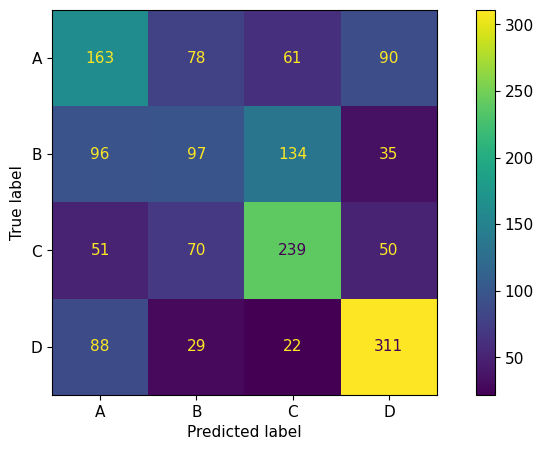

In [77]:
cm_display.plot()
plt.show()

In [78]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
dTree_clf = DecisionTreeClassifier()
param_dist = {"max_depth": range(3,10,2),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(dTree_clf, param_dist, cv=5)
tree_cv.fit(X_train,y_train)
pred_tree_cv = tree_cv.predict(X_test)

In [79]:
tree_cv = RandomizedSearchCV(dTree_clf, param_dist, cv=5)

In [80]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 10, 2),
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022B0B89C400>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022B0B8B68F0>})

In [81]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 8}

In [82]:
y_pred_tree_cv = tree_cv.predict(X_test)


In [83]:
fill_metrics('Decision Tree', y_pred_tree_cv)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.513631,0.497132,0.513631,0.495509
SVM,0.511772,0.495632,0.511772,0.495994
Decision Tree,0.478315,0.471231,0.478315,0.473547
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,0.488848,0.495692,0.488848,0.491707
Neural Network,0.501859,0.490427,0.501859,0.494131


In [84]:
from sklearn.metrics import accuracy_score

In [85]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(xgb_classifier,
                            param_distributions=params,
                            n_iter=5,scoring='accuracy',
                            n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [86]:
predictions_xg = rs_model.predict(X_test)
rs_model.score(X_test, y_test)

0.5384138785625775

In [87]:
fill_metrics('Xgboost', predictions_xg)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.513631,0.497132,0.513631,0.495509
SVM,0.511772,0.495632,0.511772,0.495994
Decision Tree,0.478315,0.471231,0.478315,0.473547
Xgboost,0.538414,0.534991,0.538414,0.536455
Gradient Boosting Classifier,0.488848,0.495692,0.488848,0.491707
Neural Network,0.501859,0.490427,0.501859,0.494131


# Model Evaluation

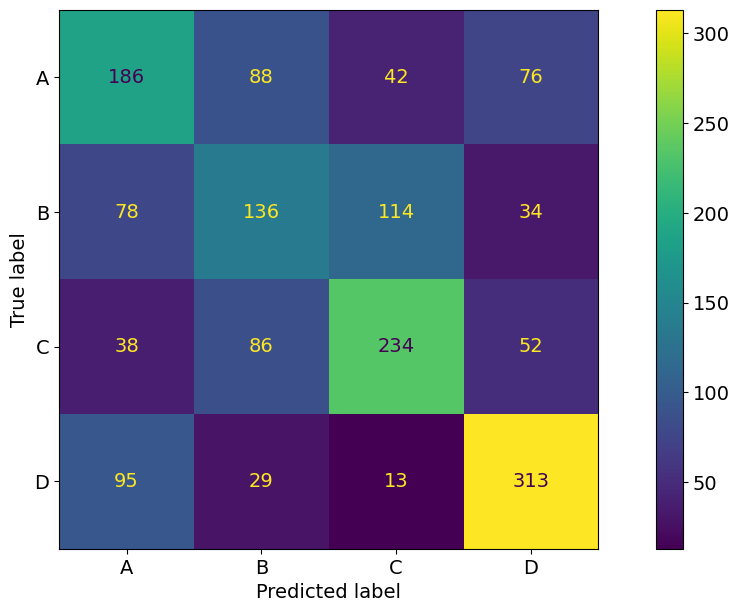

In [88]:
from sklearn import metrics
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams.update({'font.size': 14})


confusion_matrix = metrics.confusion_matrix(y_test, predictions_xg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['A', 'B', 'C', 'D'])

cm_display.plot()
plt.show()

In [89]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'B', 'C', 'D'])

In [90]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 392]
 [  1 362]
 [  2 410]
 [  3 450]]


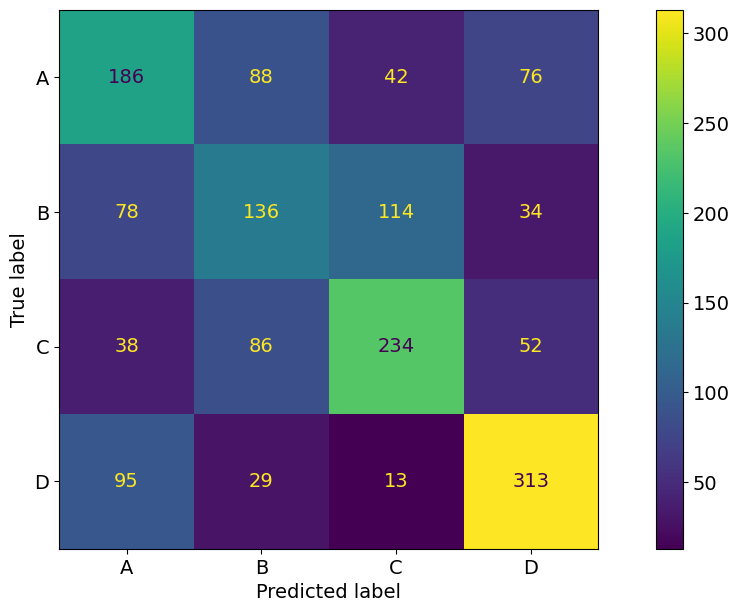

In [91]:

cm_display.plot()
plt.show()

In [92]:
from sklearn.metrics import classification_report
label_names = ['A', 'B', 'C', 'D']
print(classification_report(y_test, predictions_xg, target_names = label_names))

              precision    recall  f1-score   support

           A       0.47      0.47      0.47       392
           B       0.40      0.38      0.39       362
           C       0.58      0.57      0.58       410
           D       0.66      0.70      0.68       450

    accuracy                           0.54      1614
   macro avg       0.53      0.53      0.53      1614
weighted avg       0.53      0.54      0.54      1614

